In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

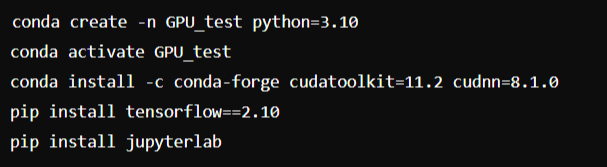


In [3]:
tf.__version__

'2.10.0'

In [4]:

tf.test.is_built_with_cuda()

True

In [5]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [9]:

def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

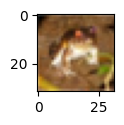

In [10]:

plot_sample(0)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

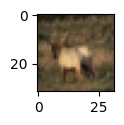

In [12]:

plot_sample(3)

In [13]:

classes[y_train[3][0]]

'deer'

In [14]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [15]:

y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [16]:

y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:

y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 7s 3ms/step - loss: 1.8063 - accuracy: 0.3567


In [19]:

np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 1s 2ms/step


1

In [20]:

y_test[0]

array([3], dtype=uint8)

def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Measure training time on a CPU

In [22]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 32s 20ms/step - loss: 1.8186 - accuracy: 0.3517
32.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [23]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 6s 4ms/step - loss: 1.8158 - accuracy: 0.3530
6.68 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [24]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8165 - accuracy: 0.3511
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6271 - accuracy: 0.4266
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5463 - accuracy: 0.4532
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4858 - accuracy: 0.4768
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4383 - accuracy: 0.4955
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3935 - accuracy: 0.5112
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3548 - accuracy: 0.5227
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3205 - accuracy: 0.5356
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2864 - accuracy: 0.5502
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.256